In [2]:
import pandas as pd
df = pd.read_excel('Table1.xlsx', engine='openpyxl')
print(df.head())

     COM Nom Commune  N TL  P20_SCOL1517  P20_SCOL1824  ETTEF2021  \
0  16001       Abzac     0            16             1          1   
1  16002  Les Adjots     0            25             3          0   
2  16003       Agris     0            34            14          0   
3  16005       Aigre     0            36            13          7   
4  16007      Alloue     0            14             2          0   

   P20_SCOL2529  P20_NSCOL15P_CAPBEP  P20_NSCOL15P_BAC  P20_NSCOL15P_SUP2  \
0             0                  133                58                 32   
1             0                  139                67                 39   
2             1                  227               126                 59   
3             0                  428               231                 93   
4             0                  118                72                 34   

   ...  P20_ACT_SUP5  P20_INACT1564  P20_ETUD1564  P20_RETR1564  \
0  ...      7.061724     100.620543     16.267295     4

In [3]:
df['NTLBIN'] = df['N TL'].apply(lambda x: 0 if x == 0 else 1)

# Supprimer la colonne N TL
df = df.drop(columns=['N TL'])

# Enregistrer le DataFrame modifié dans un nouveau fichier CSV
df.to_csv('Table1_bin.csv', index=False)

# Afficher les premières lignes pour vérifier
df


,COM,Nom Commune,P20_SCOL1517,P20_SCOL1824,ETTEF2021,P20_SCOL2529,P20_NSCOL15P_CAPBEP,P20_NSCOL15P_BAC,P20_NSCOL15P_SUP2,P20_NSCOL15P_SUP34,...,P20_INACT1564,P20_ETUD1564,P20_RETR1564,P20_AINACT1564,C20_ACT1564_CS2,C20_ACT1564_CS3,C20_ACT1564_CS4,MED20,NBPERSMENFISC20,NTLBIN
0,16001,Abzac,16,1,1,0,133,58,32,27,...,100.620543,16.267295,46.151086,38.202163,25.128929,0.000000,25.231153,17790,414,0
1,16002,Les Adjots,25,3,0,0,139,67,39,24,...,81.589260,26.683218,14.647133,40.258910,34.236163,9.865118,44.286133,18440,518,0
2,16003,Agris,34,14,0,1,227,126,59,30,...,115.236952,36.276000,48.127527,30.833425,45.350986,20.465559,80.400769,19930,834,0
3,16005,Aigre,36,13,7,0,428,231,93,59,...,216.673739,39.657939,93.347382,83.668418,25.562310,40.045551,111.651812,19770,1369,0
4,16007,Alloue,14,2,0,0,118,72,34,15,...,65.797033,14.244826,29.320650,22.231557,20.210389,5.078228,25.340139,18680,452,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4303,87202,Veyrac,88,51,2,2,423,320,195,183,...,270.605270,114.561527,91.400919,64.642824,75.769463,166.790877,327.901055,24130,2175,0
4304,87203,Vicq-sur-Breuilh,61,23,0,1,256,196,138,105,...,155.347561,70.430469,52.828831,32.088261,59.860525,80.062796,213.159050,22760,1357,0
4305,87204,Videix,3,2,0,0,64,26,9,7,...,35.000000,5.000000,18.000000,12.000000,15.000000,0.000000,5.000000,17930,197,0
4306,87205,Le Vigen,104,74,8,1,428,323,292,227,...,352.000000,159.000000,126.000000,67.000000,55.000000,215.000000,420.000000,24760,2264,0


In [4]:
non_str_columns = df.select_dtypes(exclude=['object']).columns

# Calculer la corrélation entre chaque variable numérique et la variable cible 'N TL'
correlations = {}
for column in non_str_columns:
    correlation = df['NTLBIN'].corr(df[column])
    correlations[column] = correlation

# Afficher les corrélations pour chaque variable
for column, correlation in correlations.items():
    print(f"Corrélation avec 'N TL' pour la variable '{column}': {correlation}")

Corrélation avec 'N TL' pour la variable 'COM': 0.018302493070211187
Corrélation avec 'N TL' pour la variable 'P20_SCOL1517': 0.36949628734930506
Corrélation avec 'N TL' pour la variable 'P20_SCOL1824': 0.20901019828355444
Corrélation avec 'N TL' pour la variable 'ETTEF2021': 0.32097870695382474
Corrélation avec 'N TL' pour la variable 'P20_SCOL2529': 0.18279428965533923
Corrélation avec 'N TL' pour la variable 'P20_NSCOL15P_CAPBEP': 0.41540788383819616
Corrélation avec 'N TL' pour la variable 'P20_NSCOL15P_BAC': 0.3693281144589959
Corrélation avec 'N TL' pour la variable 'P20_NSCOL15P_SUP2': 0.3449656015187334
Corrélation avec 'N TL' pour la variable 'P20_NSCOL15P_SUP34': 0.30139183822566784
Corrélation avec 'N TL' pour la variable 'P20_NSCOL15P_SUP5': 0.22921886644133516
Corrélation avec 'N TL' pour la variable 'ETTEF5021': 0.31409608015975254
Corrélation avec 'N TL' pour la variable 'ETTEF1021': 0.3162422005585661
Corrélation avec 'N TL' pour la variable 'ETTEF121': 0.32129132465860

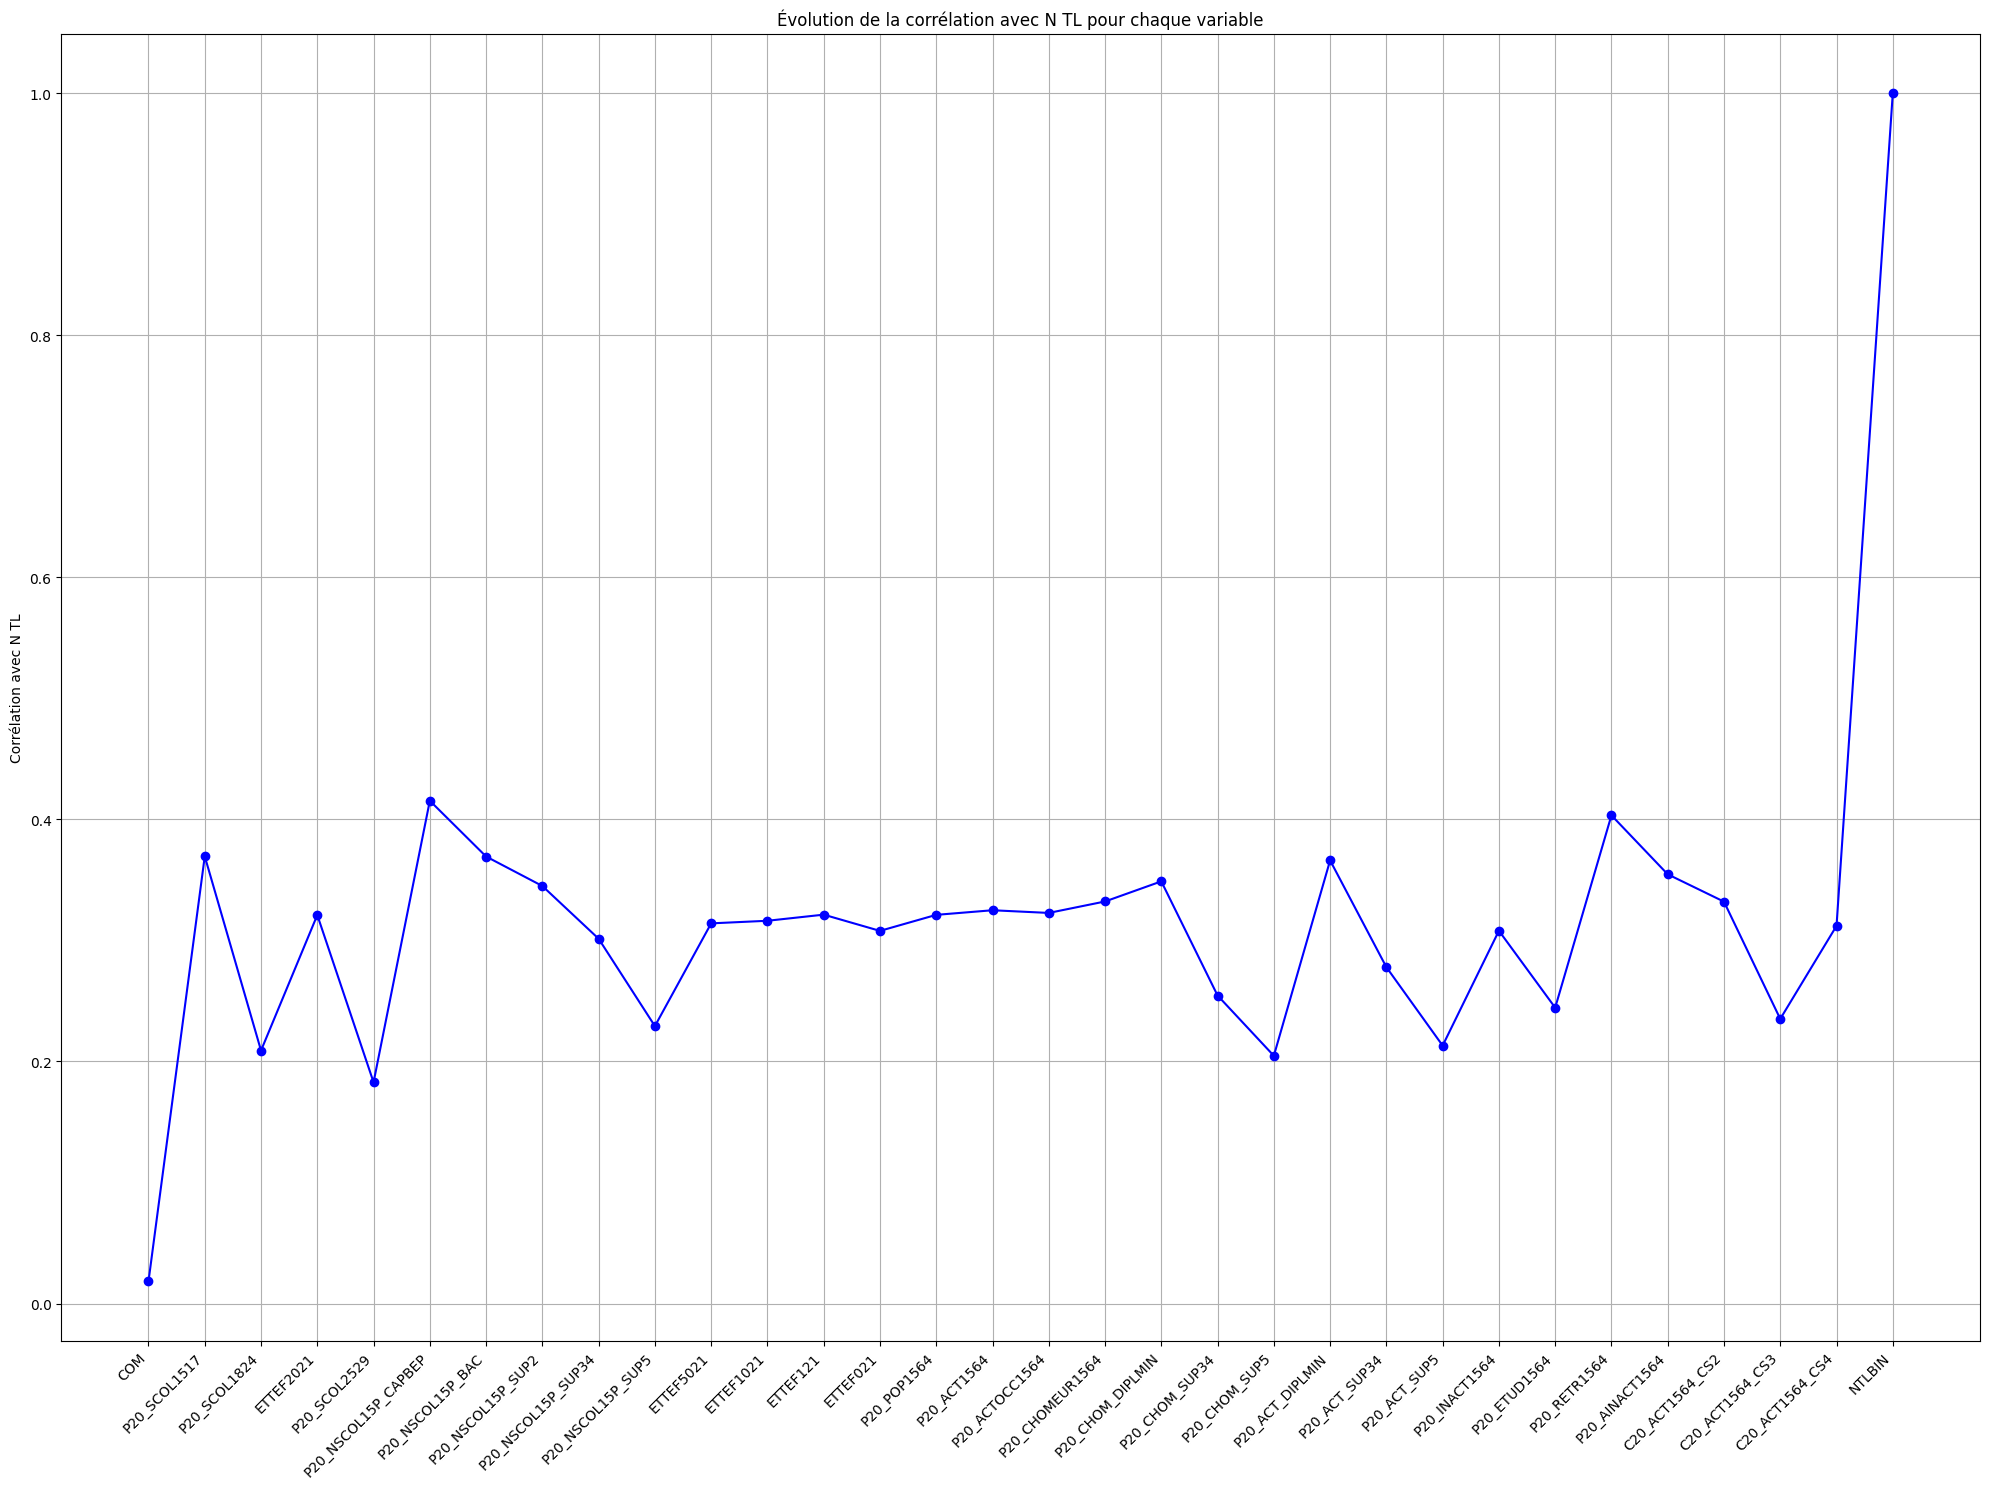

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# Supposons que df et correlations soient déjà définis
# df = df.drop(columns=['COM'])
# correlations = {'var1': 0.5, 'var2': 0.7, ...}

# Créez le DataFrame de corrélation
correlation_df = pd.DataFrame(correlations.values(), index=correlations.keys(), columns=['Corrélation'])

# Assurez-vous que l'index est au bon format (si nécessaire)
# correlation_df.index = pd.to_datetime(correlation_df.index)

# Tracez le graphique de l'évolution de la corrélation au fil du temps
plt.figure(figsize=(20, 15))
plt.plot(correlation_df.index, correlation_df['Corrélation'], marker='o', color='blue')
plt.ylabel('Corrélation avec N TL')
plt.title('Évolution de la corrélation avec N TL pour chaque variable')
plt.grid(True)

# Ajustez les étiquettes de l'axe des abscisses
plt.xticks(ticks=correlation_df.index, labels=correlation_df.index, rotation=45, ha='right')

plt.tight_layout()
plt.show()



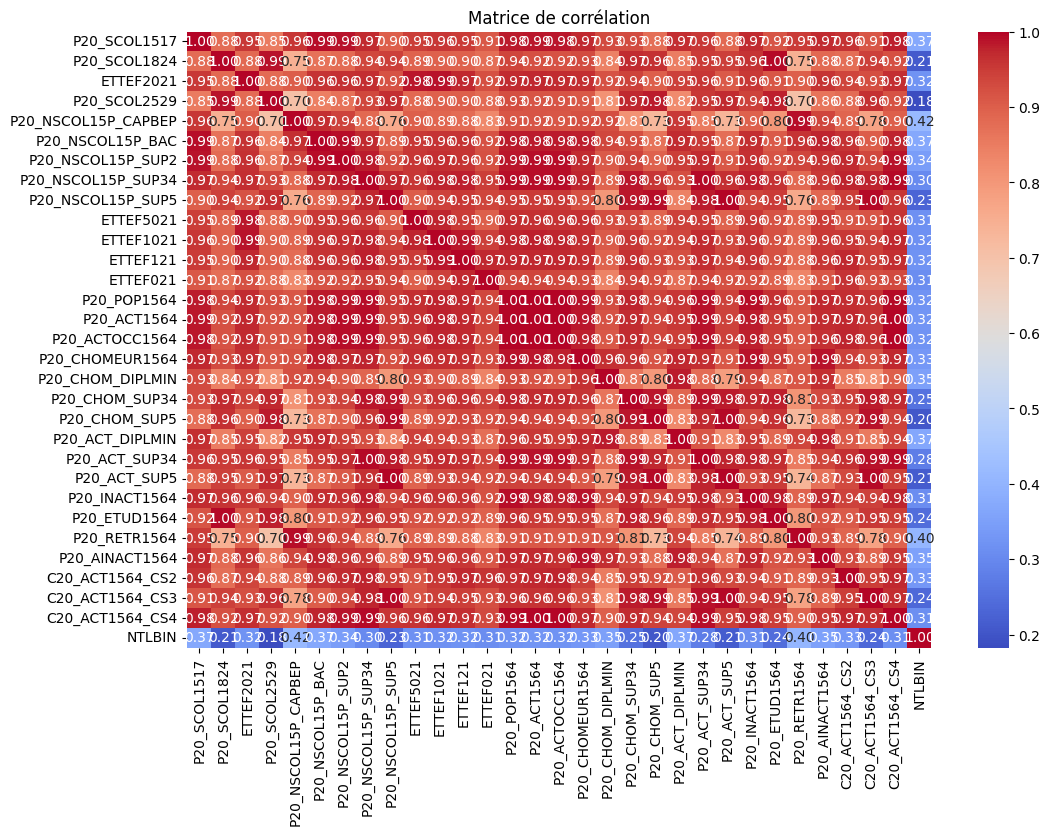

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt


selected_df_numeric = df.select_dtypes(include=['float64', 'int64'])

correlation_matrix = selected_df_numeric.corr()

# Créer une figure et un axe
plt.figure(figsize=(12, 8))

# Tracer la matrice de corrélation avec des carrés de couleur
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Ajouter un titre
plt.title('Matrice de corrélation')

# Afficher le graphique
plt.show()

In [7]:
df.head()

,Nom Commune,P20_SCOL1517,P20_SCOL1824,ETTEF2021,P20_SCOL2529,P20_NSCOL15P_CAPBEP,P20_NSCOL15P_BAC,P20_NSCOL15P_SUP2,P20_NSCOL15P_SUP34,P20_NSCOL15P_SUP5,...,P20_INACT1564,P20_ETUD1564,P20_RETR1564,P20_AINACT1564,C20_ACT1564_CS2,C20_ACT1564_CS3,C20_ACT1564_CS4,MED20,NBPERSMENFISC20,NTLBIN
0,Abzac,16,1,1,0,133,58,32,27,8,...,100.620543,16.267295,46.151086,38.202163,25.128929,0.000000,25.231153,17790,414,0
1,Les Adjots,25,3,0,0,139,67,39,24,16,...,81.589260,26.683218,14.647133,40.258910,34.236163,9.865118,44.286133,18440,518,0
2,Agris,34,14,0,1,227,126,59,30,18,...,115.236952,36.276000,48.127527,30.833425,45.350986,20.465559,80.400769,19930,834,0
3,Aigre,36,13,7,0,428,231,93,59,32,...,216.673739,39.657939,93.347382,83.668418,25.562310,40.045551,111.651812,19770,1369,0
4,Alloue,14,2,0,0,118,72,34,15,18,...,65.797033,14.244826,29.320650,22.231557,20.210389,5.078228,25.340139,18680,452,0


In [8]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Vérifier les colonnes disponibles
print("Colonnes disponibles :")
print(df.columns)

# Variables explicatives (exclure les colonnes de type str)
str_cols = df.select_dtypes(include=['object']).columns
X = df.drop(columns=['NTLBIN'] + list(str_cols))

# Variable cible
y = df['NTLBIN']

# Vérifier que X et y ont le même nombre de lignes
print(f"Nombre de lignes dans X : {X.shape[0]}")
print(f"Nombre de lignes dans y : {y.shape[0]}")

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Créer et entraîner le modèle de régression linéaire
model = LinearRegression()
model.fit(X_train, y_train)

# Prédire les valeurs cibles pour l'ensemble de test
y_pred = model.predict(X_test)

# Calculer et afficher l'erreur quadratique moyenne
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Colonnes disponibles :
Index(['Nom Commune', 'P20_SCOL1517', 'P20_SCOL1824', 'ETTEF2021',
       'P20_SCOL2529', 'P20_NSCOL15P_CAPBEP', 'P20_NSCOL15P_BAC',
       'P20_NSCOL15P_SUP2', 'P20_NSCOL15P_SUP34', 'P20_NSCOL15P_SUP5',
       'ETTEF5021', 'ETTEF1021', 'ETTEF121', 'ETTEF021', 'P20_POP1564',
       'P20_ACT1564', 'P20_ACTOCC1564', 'P20_CHOMEUR1564', 'P20_CHOM_DIPLMIN',
       'P20_CHOM_SUP34', 'P20_CHOM_SUP5', 'P20_ACT_DIPLMIN', 'P20_ACT_SUP34',
       'P20_ACT_SUP5', 'P20_INACT1564', 'P20_ETUD1564', 'P20_RETR1564',
       'P20_AINACT1564', 'C20_ACT1564_CS2', 'C20_ACT1564_CS3',
       'C20_ACT1564_CS4', 'MED20', 'NBPERSMENFISC20', 'NTLBIN'],
      dtype='object')
Nombre de lignes dans X : 4308
Nombre de lignes dans y : 4308
Mean Squared Error: 0.03947684347476926


In [9]:
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

# Vérifier les colonnes disponibles
print("Colonnes disponibles :")
print(df.columns)

# Variables explicatives (exclure les colonnes de type str)
str_cols = df.select_dtypes(include=['object']).columns
X = df.drop(columns=['NTLBIN'] + list(str_cols))

# Variable cible
y = df['NTLBIN']

# Ajouter une constante (intercept) aux variables explicatives
X = sm.add_constant(X)

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Créer le modèle de régression linéaire
model = sm.OLS(y_train, X_train)

# Ajuster le modèle
results = model.fit()

# Afficher le résumé des résultats, y compris les p-values
print(results.summary())

# Prédire les valeurs cibles pour l'ensemble de test
y_pred = results.predict(X_test)

# Calculer et afficher l'erreur quadratique moyenne
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")


Colonnes disponibles :
Index(['Nom Commune', 'P20_SCOL1517', 'P20_SCOL1824', 'ETTEF2021',
       'P20_SCOL2529', 'P20_NSCOL15P_CAPBEP', 'P20_NSCOL15P_BAC',
       'P20_NSCOL15P_SUP2', 'P20_NSCOL15P_SUP34', 'P20_NSCOL15P_SUP5',
       'ETTEF5021', 'ETTEF1021', 'ETTEF121', 'ETTEF021', 'P20_POP1564',
       'P20_ACT1564', 'P20_ACTOCC1564', 'P20_CHOMEUR1564', 'P20_CHOM_DIPLMIN',
       'P20_CHOM_SUP34', 'P20_CHOM_SUP5', 'P20_ACT_DIPLMIN', 'P20_ACT_SUP34',
       'P20_ACT_SUP5', 'P20_INACT1564', 'P20_ETUD1564', 'P20_RETR1564',
       'P20_AINACT1564', 'C20_ACT1564_CS2', 'C20_ACT1564_CS3',
       'C20_ACT1564_CS4', 'MED20', 'NBPERSMENFISC20', 'NTLBIN'],
      dtype='object')
                            OLS Regression Results                            
Dep. Variable:                 NTLBIN   R-squared:                       0.241
Model:                            OLS   Adj. R-squared:                  0.235
Method:                 Least Squares   F-statistic:                     40.15
Date: 

In [10]:
import pandas as pd
import statsmodels.api as sm


# Sélectionner les variables explicatives et la variable cible
X = df.drop(columns=['NTLBIN'])
y = df['NTLBIN']

# Supprimer les colonnes de type chaîne de caractères
str_cols = X.select_dtypes(include=['object']).columns
X = X.drop(columns=str_cols)

# Ajouter une constante pour l'interception
X = sm.add_constant(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fonction pour réaliser la régression linéaire et supprimer les variables avec p-value > 0.05
def perform_regression(X_train, y_train):
    while True:
        model = sm.OLS(y_train, X_train).fit()
        p_values = model.pvalues.drop('const')  # Exclure la constante
        max_p_value = p_values.max()
        if max_p_value > 0.01:
            worst_feature = p_values.idxmax()
            if worst_feature in X_train.columns:
                X_train = X_train.drop(columns=[worst_feature])
            else:
                print(f"La variable '{worst_feature}' n'existe pas dans le jeu de données.")
                break
        else:
            break
    return model

# Réaliser la régression linéaire
final_model = perform_regression(X_train, y_train)

# Afficher les résultats du modèle final
print(final_model.summary())

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

                            OLS Regression Results                            
Dep. Variable:                 NTLBIN   R-squared:                       0.232
Model:                            OLS   Adj. R-squared:                  0.229
Method:                 Least Squares   F-statistic:                     86.20
Date:                Thu, 13 Jun 2024   Prob (F-statistic):          3.87e-186
Time:                        11:18:39   Log-Likelihood:                 1008.7
No. Observations:                3446   AIC:                            -1991.
Df Residuals:                    3433   BIC:                            -1912.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.0062      0.00

In [11]:
import numpy as np
model_columns = final_model.params.index.tolist()
common_columns = list(model_columns)

# Supprimer 'const' de la liste
if 'const' in common_columns:
    common_columns.remove('const')

columns_to_include = ["COM", "Nom Commune", "NTLBIN"] + common_columns

# Afficher les colonnes à inclure
print(columns_to_include)
np.shape(columns_to_include)


['COM', 'Nom Commune', 'NTLBIN', 'P20_SCOL1824', 'P20_SCOL2529', 'P20_NSCOL15P_SUP2', 'ETTEF5021', 'ETTEF1021', 'ETTEF021', 'P20_POP1564', 'P20_CHOM_DIPLMIN', 'P20_CHOM_SUP5', 'P20_ETUD1564', 'P20_RETR1564', 'C20_ACT1564_CS4']


(15,)

In [12]:
# Charger le DataFrame initial à partir de Table1.xlsx
df = pd.read_csv('Table1_bin.csv')

# Sélectionner les colonnes spécifiées
selected_df = df[columns_to_include]

# Enregistrer le DataFrame sélectionné dans un fichier CSV
selected_df.to_csv('selected_variables_bin.csv', index=False)

In [13]:
selected_df.head()

,COM,Nom Commune,NTLBIN,P20_SCOL1824,P20_SCOL2529,P20_NSCOL15P_SUP2,ETTEF5021,ETTEF1021,ETTEF021,P20_POP1564,P20_CHOM_DIPLMIN,P20_CHOM_SUP5,P20_ETUD1564,P20_RETR1564,C20_ACT1564_CS4
0,16001,Abzac,0,1,0,32,0,0,0,286.333461,5.113539,0.000000,16.267295,46.151086,25.231153
1,16002,Les Adjots,0,3,0,39,0,1,0,319.333868,1.954577,1.954577,26.683218,14.647133,44.286133
2,16003,Agris,0,14,1,59,0,4,3,537.453410,14.116925,0.942841,36.276000,48.127527,80.400769
3,16005,Aigre,0,13,0,93,1,8,6,798.801007,24.291169,0.000000,39.657939,93.347382,111.651812
4,16007,Alloue,0,2,0,34,0,1,3,261.517159,3.057241,0.000000,14.244826,29.320650,25.340139


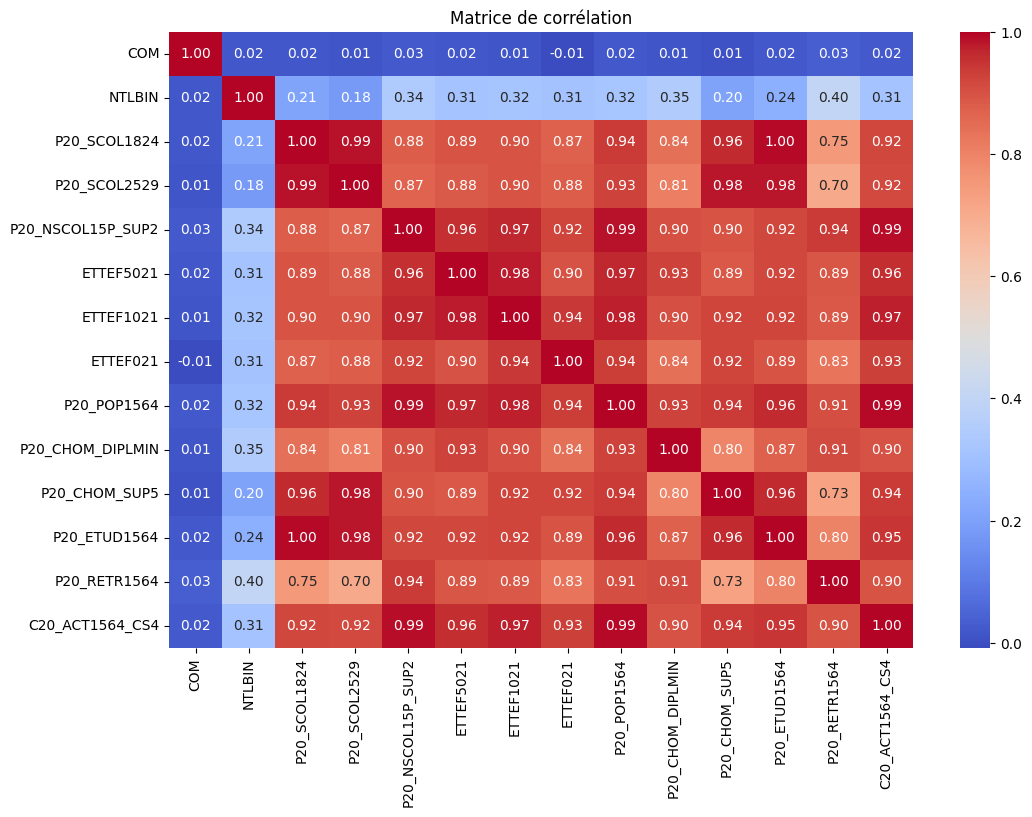

In [14]:
selected_df_numeric = selected_df.select_dtypes(include=['float64', 'int64'])
correlation_matrix = selected_df_numeric.corr()

# Créer une figure et un axe
plt.figure(figsize=(12, 8))

# Tracer la matrice de corrélation avec des carrés de couleur
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Ajouter un titre
plt.title('Matrice de corrélation')

# Afficher le graphique
plt.show()


NTLBIN en binaire --> régression logistique

In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Charger les données
df_bin = pd.read_csv('Table1_bin.csv')

# Sélectionner uniquement les colonnes numériques
df_bin_numeric = df_bin.select_dtypes(include=['number'])

# Séparer les variables explicatives (X) et la variable cible (y)
X = df_bin_numeric.drop(columns=['NTLBIN'])
y = df_bin_numeric['NTLBIN']

# Séparer les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialiser et entraîner le modèle de régression logistique
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

# Faire des prédictions sur l'ensemble de test
y_pred = log_reg.predict(X_test)

# Afficher les résultats
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))


Confusion Matrix:
[[816   4]
 [ 34   8]]

Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       820
           1       0.67      0.19      0.30        42

    accuracy                           0.96       862
   macro avg       0.81      0.59      0.64       862
weighted avg       0.95      0.96      0.94       862


Accuracy Score:
0.9559164733178654


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [16]:
df_bin = pd.read_csv('Table1_bin.csv')

# Sélectionner uniquement les colonnes numériques
df_bin_numeric = df_bin.select_dtypes(include=['number'])

# Séparer les variables explicatives (X) et la variable cible (y)
X = df_bin_numeric.drop(columns=['NTLBIN'])
y = df_bin_numeric['NTLBIN']

# Séparer les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
log_reg = sm.Logit(y_train, X_train)
result = log_reg.fit()

# Afficher le résumé du modèle
print(result.summary())


         Current function value: 0.202567
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:                 NTLBIN   No. Observations:                 3446
Model:                          Logit   Df Residuals:                     3418
Method:                           MLE   Df Model:                           27
Date:                Thu, 13 Jun 2024   Pseudo R-squ.:                 -0.1150
Time:                        11:18:40   Log-Likelihood:                -698.04
converged:                      False   LL-Null:                       -626.08
Covariance Type:            nonrobust   LLR p-value:                     1.000
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
COM                    -0.0001   4.02e-06    -25.454      0.000      -0.000   -9.44e-05
P20_SCOL1517            0.0177      0.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [17]:
print("\nP-values des coefficients:")
for variable, p_value in result.pvalues.items():
    if p_value < 0.01:
        print(f"Variable: {variable}, P-value: {p_value}")


P-values des coefficients:
Variable: COM, P-value: 6.386750277876221e-143
Variable: P20_SCOL2529, P-value: 0.0009230355978749971
Variable: P20_NSCOL15P_BAC, P-value: 0.006148692516598875


In [18]:
df.head()

,COM,Nom Commune,P20_SCOL1517,P20_SCOL1824,ETTEF2021,P20_SCOL2529,P20_NSCOL15P_CAPBEP,P20_NSCOL15P_BAC,P20_NSCOL15P_SUP2,P20_NSCOL15P_SUP34,...,P20_INACT1564,P20_ETUD1564,P20_RETR1564,P20_AINACT1564,C20_ACT1564_CS2,C20_ACT1564_CS3,C20_ACT1564_CS4,MED20,NBPERSMENFISC20,NTLBIN
0,16001,Abzac,16,1,1,0,133,58,32,27,...,100.620543,16.267295,46.151086,38.202163,25.128929,0.000000,25.231153,17790,414,0
1,16002,Les Adjots,25,3,0,0,139,67,39,24,...,81.589260,26.683218,14.647133,40.258910,34.236163,9.865118,44.286133,18440,518,0
2,16003,Agris,34,14,0,1,227,126,59,30,...,115.236952,36.276000,48.127527,30.833425,45.350986,20.465559,80.400769,19930,834,0
3,16005,Aigre,36,13,7,0,428,231,93,59,...,216.673739,39.657939,93.347382,83.668418,25.562310,40.045551,111.651812,19770,1369,0
4,16007,Alloue,14,2,0,0,118,72,34,15,...,65.797033,14.244826,29.320650,22.231557,20.210389,5.078228,25.340139,18680,452,0
